  # <centre> MAGIC GAMMA TELESCOPE

Understanding the universe is like building a giant cosmic puzzle and the magic gamma telescope is a giant ear  listening for a faint firefly squeaks.By tracking the source of these squeaks we will know from where those gamma rays are from and this dataset contains all you need to identify them from other radiations.The radiatios are so energetic that they can eaisly penetrate through earth's giant air blanket and bumps into almost all air molecules, shaking them real bad. This shaken molecules lit out little squeaks of light like excited fireflies. This dataset contains simulated data that  is used to study how high energy gamma rays interact with the earth's atmosphere 

Well... what are gamma rays?
Gamma rays are high energy radiations emitted from stars and other celestial objects. They can pass through earth's atmosphere

How these radiations can be detected..?

Here comes our magic gamma telescope, a cherenkov telescope. They work by detecting the faint light that's emitted when gamma particles interact with earth's atmosphere.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import RocCurveDisplay,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
cols = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df = pd.read_csv("./magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df["class"] = (df["class"]=="g").astype(int)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  int32  
dtypes: float64(10), int32(1)
memory usage: 1.5 MB


In [5]:
df.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

In [6]:
df.duplicated().sum()

115

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fLength,18905.0,53.161416,42.259789,4.2835,24.3597,37.1295,69.9754,334.1770
fWidth,18905.0,22.145872,18.300664,0.0000,11.8742,17.1438,24.7124,256.3820
fSize,18905.0,2.824643,0.472377,1.9413,2.4771,2.7400,3.1011,5.3233
fConc,18905.0,0.380247,0.182709,0.0131,0.2358,0.3540,0.5035,0.8930
fConc1,18905.0,0.214560,0.110384,0.0003,0.1285,0.1964,0.2850,0.6752
fAsym,18905.0,-4.177867,59.010059,-457.9161,-20.4791,4.0629,24.1335,575.2407
fM3Long,18905.0,10.618826,50.900687,-331.7800,-12.7693,15.3380,35.8694,238.3210
fM3Trans,18905.0,0.259364,20.775268,-205.8947,-10.8358,0.7500,10.9489,179.8510
fAlpha,18905.0,27.551644,26.083055,0.0000,5.5164,17.5330,45.7040,90.0000
fDist,18905.0,193.712554,74.685712,1.2826,142.2690,191.8320,240.4090,495.5610


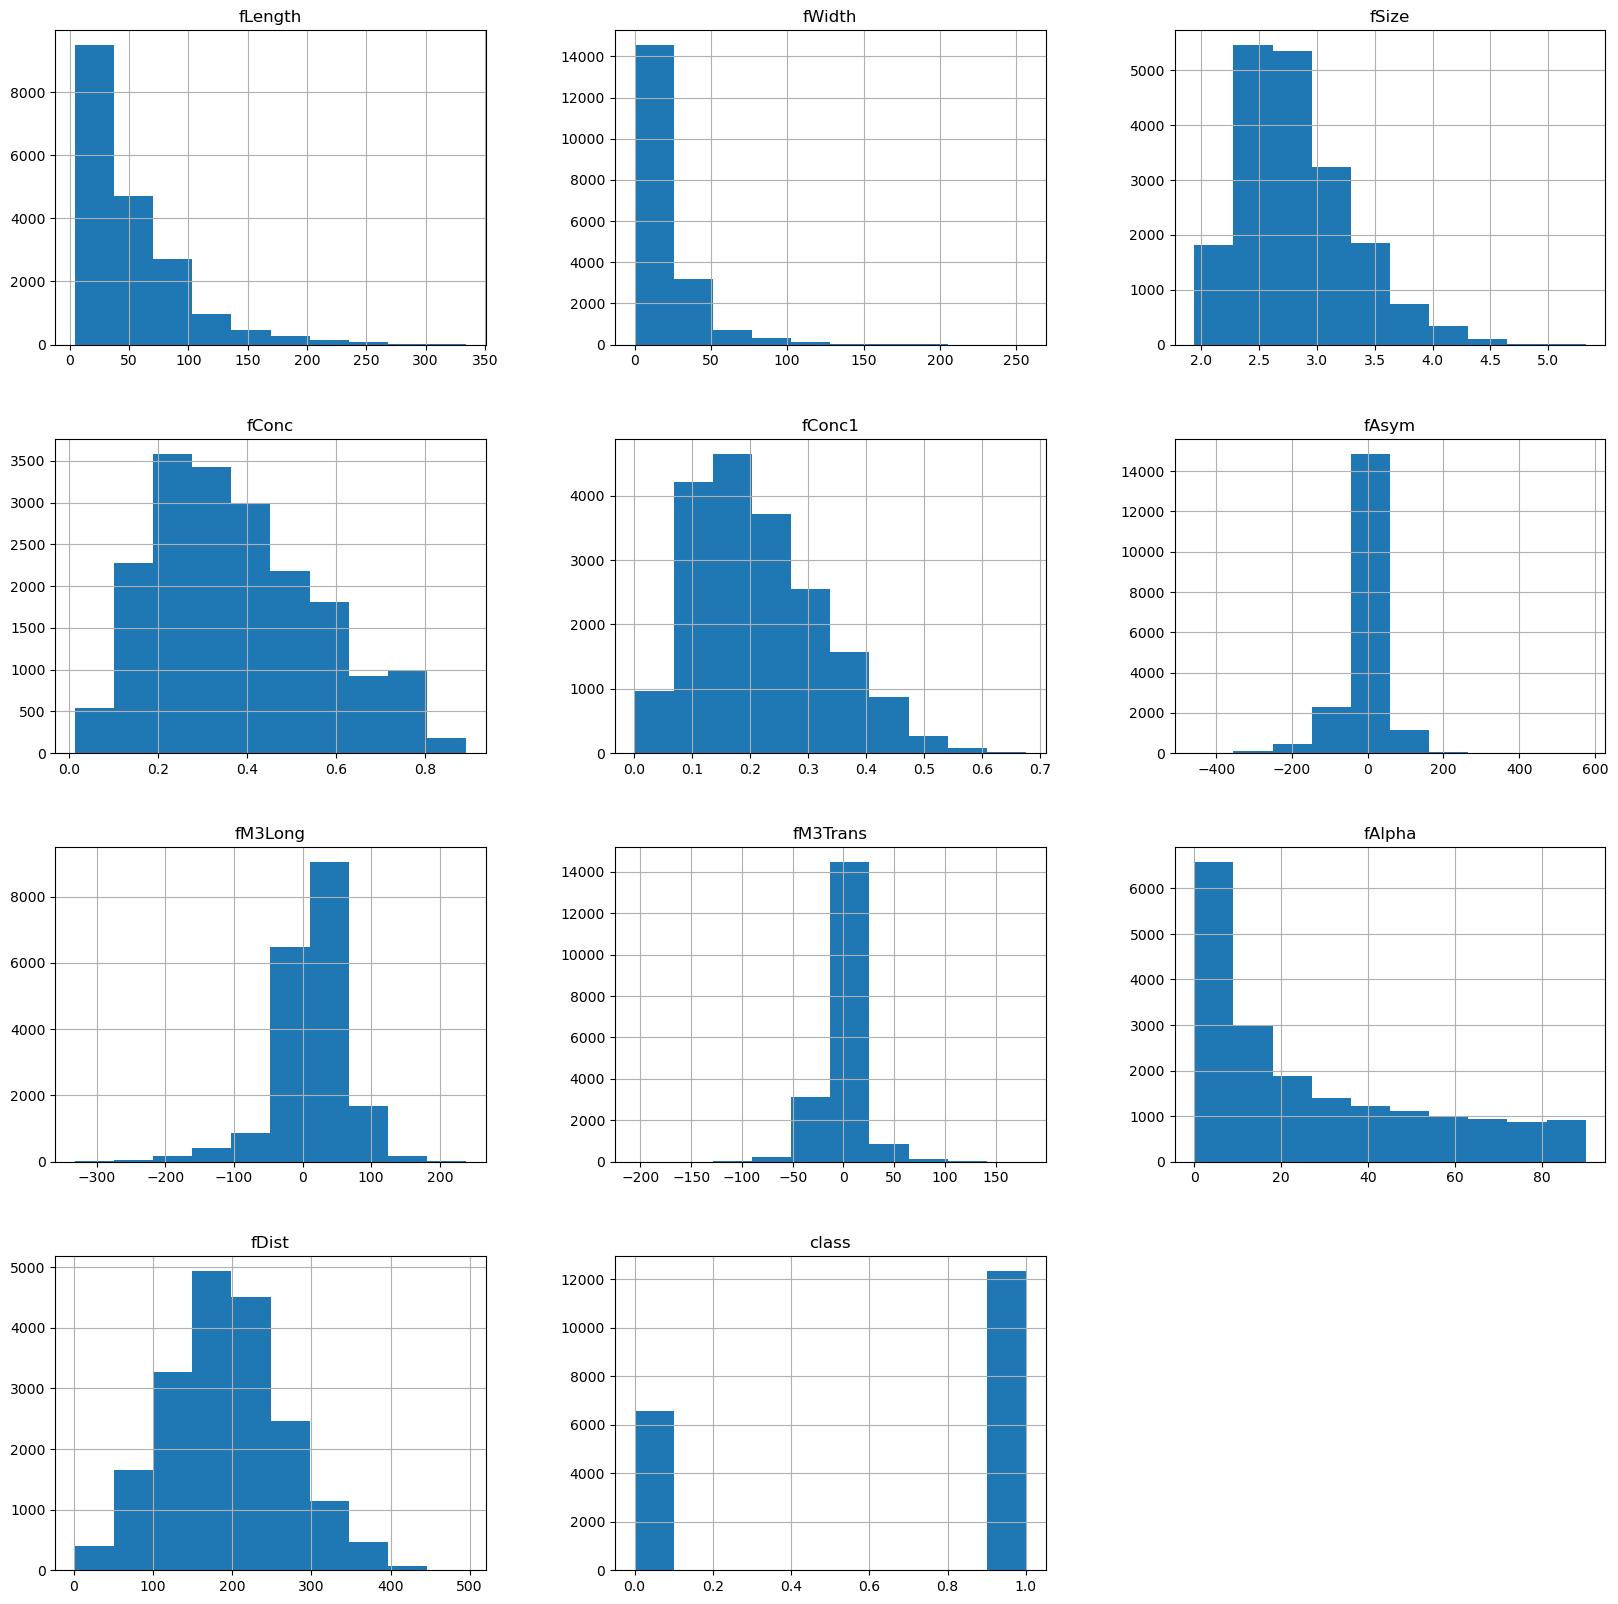

In [9]:
p = df.hist(figsize=(20,20))

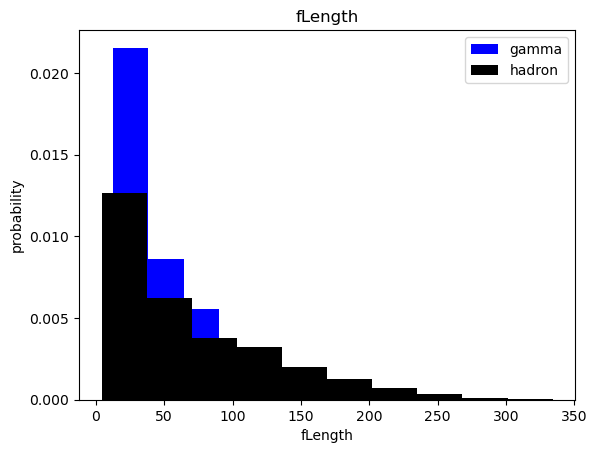

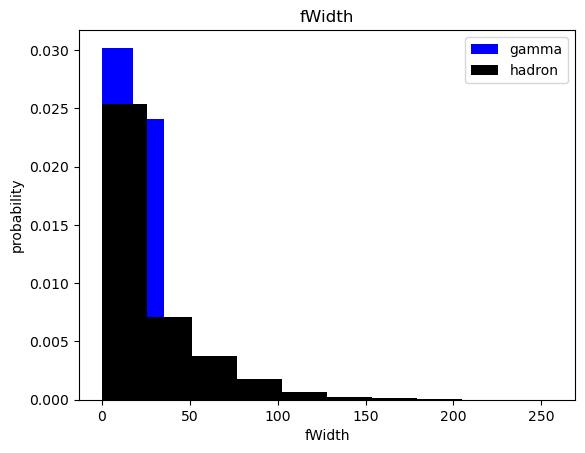

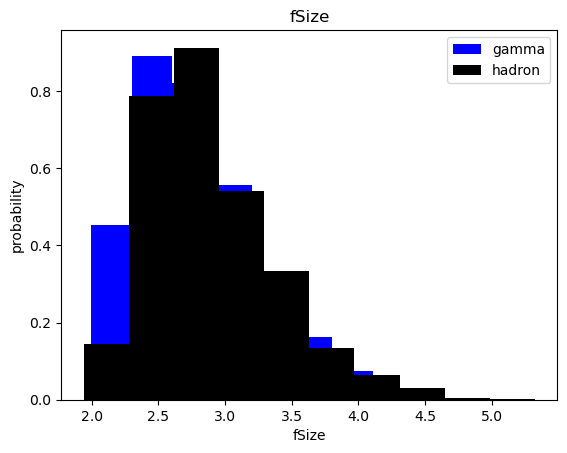

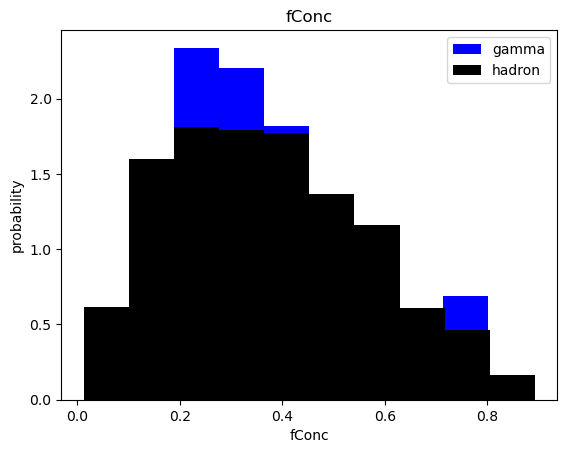

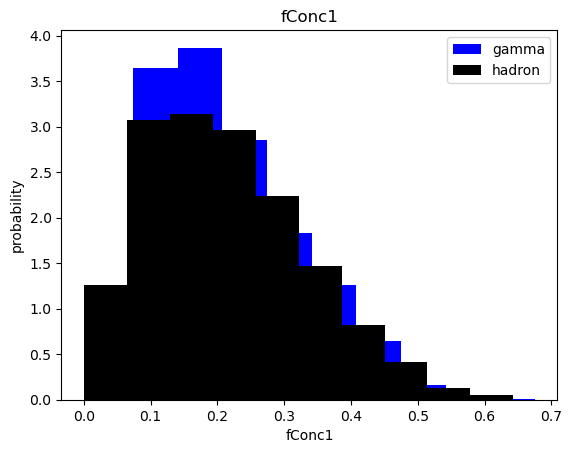

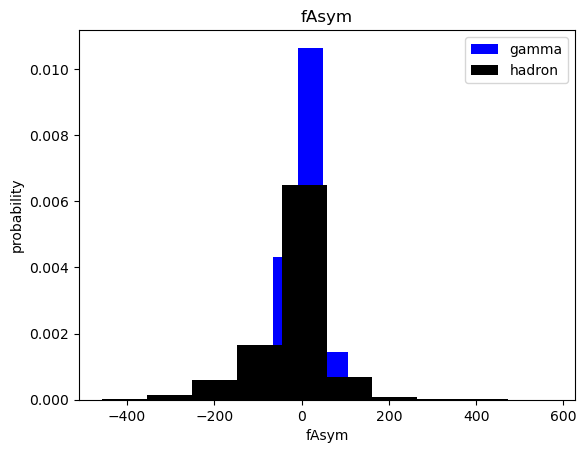

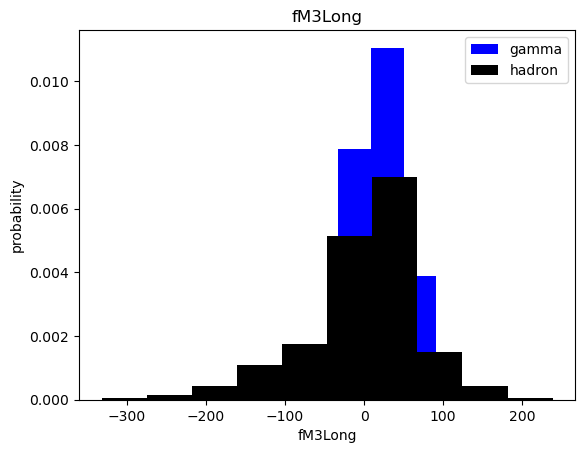

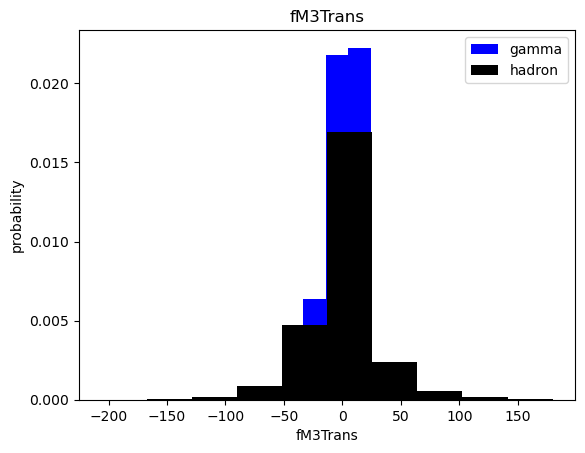

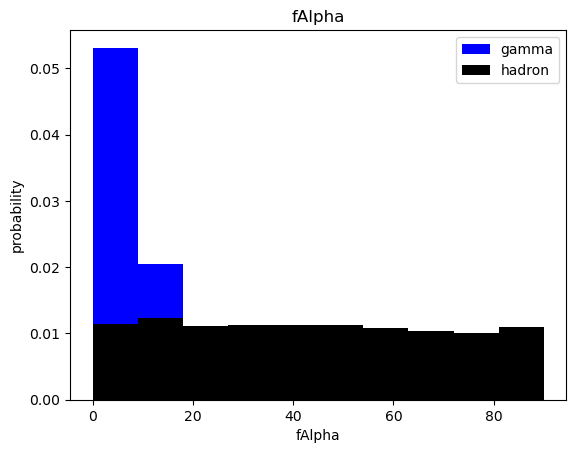

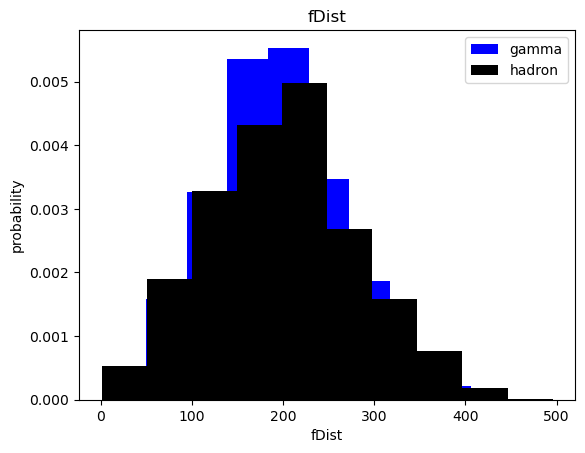

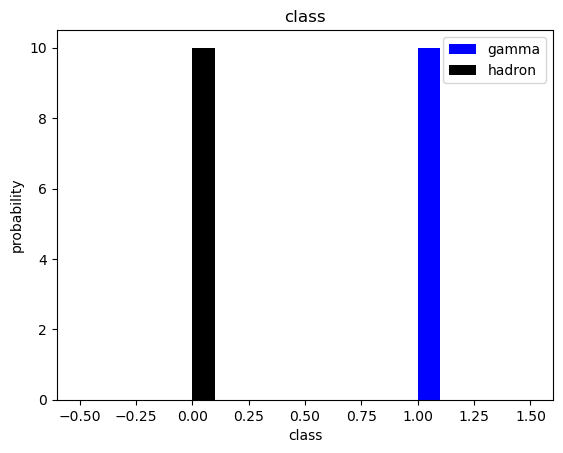

In [10]:
#Since we have 2 categories in class  which are gamma and hadron...why not plotting histogram in a way so that we can compare those two ??
#here is the code for that...
for i in cols:
    plt.hist(df[df["class"]==1][i],color="blue",label='gamma',density=True)
    plt.hist(df[df["class"]==0][i],color="black",label='hadron',density=True)
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel("probability")
    plt.legend()
    plt.show()

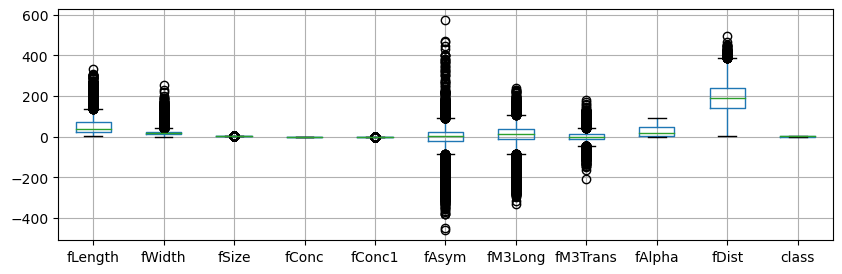

In [11]:
#boxplot
p = df.boxplot(figsize=(10,3))

train,valid,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [12]:
x = df.iloc[:,:-1].values

In [13]:
y = df.iloc[:,-1:].values

In [14]:
sc = StandardScaler()

In [15]:
x = sc.fit_transform(x)

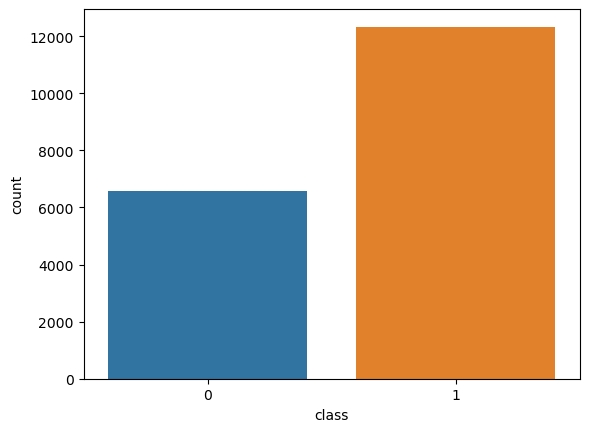

In [16]:
sns.countplot(data=df,x="class");

In [17]:
#as you can see from the above count plot, our target column is unbalanced. To balance the data we will import randomoversampler here..
from imblearn.over_sampling import RandomOverSampler

In [18]:
oversample = RandomOverSampler(sampling_strategy="minority")

In [19]:
x_over,y_over =oversample.fit_resample(x,y)

In [20]:
y_over

array([1, 1, 1, ..., 0, 0, 0])

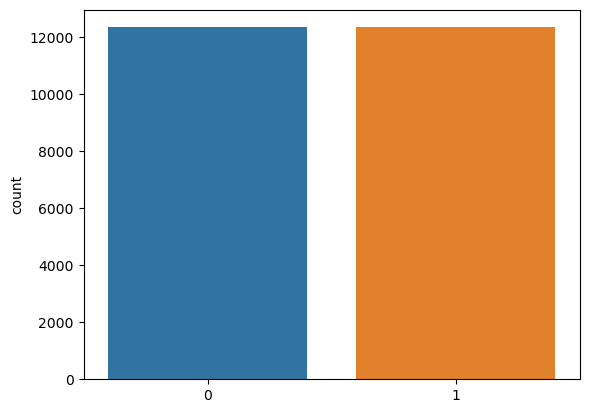

In [21]:
sns.countplot(data=df,x=y_over);

In [22]:
models ={
    'LogisticRegression':LogisticRegression(),
    'RandomForestClassifier':RandomForestClassifier(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier()
}

In [23]:
#model selection using cross validation
for name, model in models.items():
    scores =  cross_val_score(model,x,y, scoring='accuracy', cv=10,n_jobs=-1)
    print('cross_val_model:{}'.format(name))
    print('mean score:', np.mean(scores)*100)
    print('*'*100)

cross_val_model:LogisticRegression
mean score: 79.21191721297485
****************************************************************************************************
cross_val_model:RandomForestClassifier
mean score: 87.86034096346101
****************************************************************************************************
cross_val_model:KNeighborsClassifier
mean score: 84.05712383078857
****************************************************************************************************
cross_val_model:DecisionTreeClassifier
mean score: 81.20605261906162
****************************************************************************************************


#####  We are selecting Randomforest classifier as our model since it's having the highest score


In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
model = RandomForestClassifier()

In [26]:
model.fit(x_train,y_train)
trainingscore =accuracy_score(y_train,model.predict(x_train))
testingscore = accuracy_score(y_test,model.predict(x_test))
con_train = confusion_matrix(y_train,model.predict(x_train))
con_test =confusion_matrix(y_test,model.predict(x_test))
print('trainaccuracy:',trainingscore)
print('testaccuracy:',testingscore)
print('confusion matrix train:',con_train)
print('confusion matrix test:',con_test)
print('wrong prediction:',(y_test!=model.predict(x_test)).sum(),'/',((y_test==model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))

trainaccuracy: 1.0
testaccuracy: 0.8841576302565459
confusion matrix train: [[5250    0]
 [   0 9874]]
confusion matrix test: [[1029  294]
 [ 144 2314]]
wrong prediction: 6333618 / 14295961


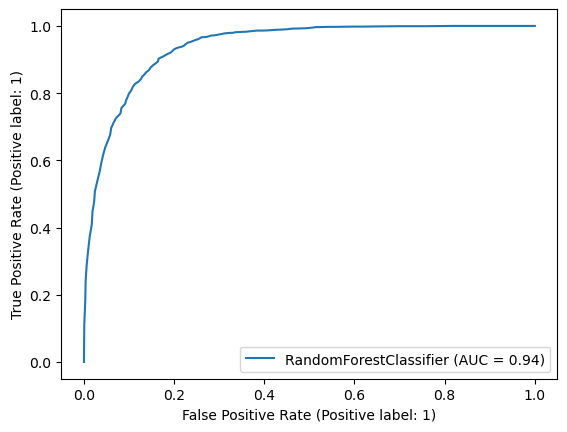

In [27]:
ROC_display = RocCurveDisplay.from_estimator(model,x_test,y_test)